# Instituto Tecnológico de Monterrey
## Maestría en Inteligencia Artificial Aplicada


### Equipo 4
#### Nancy Elena Estanislao Lizárraga - A01169334
#### Héctor Raúl Vázquez González - A00565542
#### Gustavo Rene Ramos Ojeda - A01793599

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import date
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing



# Análisis de Datos


Paso 1 - Leyendo la información del set de datos

In [2]:
# Tomando datos de la ruta local, llamando la fuente de datos dataF.csv
datosFondeo = 'dataF.csv'

In [3]:
# Datos originales
fondeoDF = pd.read_csv( datosFondeo )

# Cambiamos los headers
fondeoDF.columns = ['Day', 'Month', 'Year', 'Amount Credited', 'Amount Left', 'Day Type', 'Day of Week', 'Remain Percentage']

In [4]:
# Hay que determinar los tipos de datos
fondeoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                1012 non-null   int64  
 1   Month              1012 non-null   int64  
 2   Year               1012 non-null   int64  
 3   Amount Credited    968 non-null    float64
 4   Amount Left        968 non-null    float64
 5   Day Type           1012 non-null   object 
 6   Day of Week        1012 non-null   int64  
 7   Remain Percentage  968 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 63.4+ KB


Paso 2 - Se realiza la limpieza de la información

In [5]:
#Se agrega una columna con la fecha en un objeto de tipo Date
fondeoDF.insert(6, 'Date', True)

for row in fondeoDF.index:
    fondeoDF['Date'][ row ] = date( fondeoDF['Year'][row], fondeoDF['Month'][row], fondeoDF['Day'][row])

fondeoDF.head()

/var/folders/5r/f5hwsp1x3hxbd27x56r_yzjw0000gp/T/ipykernel_5150/3304507252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fondeoDF['Date'][ row ] = date( fondeoDF['Year'][row], fondeoDF['Month'][row], fondeoDF['Day'][row])


,Day,Month,Year,Amount Credited,Amount Left,Day Type,Date,Day of Week,Remain Percentage
0,1,6,2020,1.040468e+07,7921941.905,N,2020-06-01,1,0.238618
1,2,6,2020,8.616164e+06,7062377.510,N,2020-06-02,2,0.180334
2,3,6,2020,7.872212e+06,6372551.002,N,2020-06-03,3,0.190501
3,4,6,2020,7.835058e+06,6331527.590,N,2020-06-04,4,0.191898
4,5,6,2020,8.701642e+06,7060386.510,N,2020-06-05,5,0.188614


In [6]:

# Removemos las variables innecesarias y se dejan solamente las variables numéricas que aporten al análisis
fondeoDF.drop(columns = ['Day of Week', 'Remain Percentage'], inplace=True)

# Optamos por eliminar los datos vacíos ya que existen varios fines de semana que no se fondean.
fondeoDF.dropna( axis=0, inplace=True)

fondeoDF.head(10)

,Day,Month,Year,Amount Credited,Amount Left,Day Type,Date
0,1,6,2020,1.040468e+07,7921941.905,N,2020-06-01
1,2,6,2020,8.616164e+06,7062377.510,N,2020-06-02
2,3,6,2020,7.872212e+06,6372551.002,N,2020-06-03
3,4,6,2020,7.835058e+06,6331527.590,N,2020-06-04
4,5,6,2020,8.701642e+06,7060386.510,N,2020-06-05
5,6,6,2020,2.657577e+06,1226194.225,N,2020-06-06
7,8,6,2020,8.171846e+06,6539346.490,N,2020-06-08
8,9,6,2020,7.043053e+06,5402860.945,N,2020-06-09
9,10,6,2020,7.921840e+06,6405740.562,N,2020-06-10
10,11,6,2020,7.744115e+06,6086390.067,N,2020-06-11


In [7]:
#Verificamos los datos ya una vez limpios, observando que se removieron alrededor de 40 registros
fondeoDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 968 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              968 non-null    int64  
 1   Month            968 non-null    int64  
 2   Year             968 non-null    int64  
 3   Amount Credited  968 non-null    float64
 4   Amount Left      968 non-null    float64
 5   Day Type         968 non-null    object 
 6   Date             968 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 60.5+ KB


In [8]:
# Comprobamos que ya no existen nulos
fondeoDF.isnull().any()

Day                False
Month              False
Year               False
Amount Credited    False
Amount Left        False
Day Type           False
Date               False
dtype: bool

In [9]:
# Se hace la conversión del campo Day Type para reemplazarlo por un valor de 1-2
fondeoDF['Day Type'].replace( "N", 1, inplace=True)
fondeoDF['Day Type'].replace( "P", 2, inplace=True)

fondeoDF.head()

,Day,Month,Year,Amount Credited,Amount Left,Day Type,Date
0,1,6,2020,1.040468e+07,7921941.905,1,2020-06-01
1,2,6,2020,8.616164e+06,7062377.510,1,2020-06-02
2,3,6,2020,7.872212e+06,6372551.002,1,2020-06-03
3,4,6,2020,7.835058e+06,6331527.590,1,2020-06-04
4,5,6,2020,8.701642e+06,7060386.510,1,2020-06-05


In [10]:
# Obteniendo las características generales de nuestro dataset
fondeoDF.describe()

,Day,Month,Year,Amount Credited,Amount Left,Day Type
count,968.000000,968.000000,968.000000,9.680000e+02,9.680000e+02,968.000000
mean,15.603306,6.632231,2021.341942,8.817488e+06,6.807160e+06,1.066116
std,8.817327,3.539272,0.847050,5.588481e+06,4.563191e+06,0.248613
min,1.000000,1.000000,2020.000000,2.882250e+00,-3.565154e+05,1.000000
25%,8.000000,3.000000,2021.000000,3.641171e+06,2.145982e+06,1.000000
50%,16.000000,7.000000,2021.000000,1.013495e+07,7.884900e+06,1.000000
75%,23.000000,10.000000,2022.000000,1.260134e+07,1.001369e+07,1.000000
max,31.000000,12.000000,2023.000000,3.456432e+07,2.569507e+07,2.000000


Paso 3 - Se realiza un análisis de la información

In [11]:
# Como un primer análisis establecemos la correlación entre variables

# Se elimina el campo de fecha que es tipo Date.
fondeoSinFecha = fondeoDF.drop(columns=['Date'])

corrVar = fondeoSinFecha.corr()
corrVar

,Day,Month,Year,Amount Credited,Amount Left,Day Type
Day,1.000000,0.027265,-0.029588,0.106573,0.107511,0.221435
Month,0.027265,1.000000,-0.388846,0.033106,0.035026,0.000631
Year,-0.029588,-0.388846,1.000000,0.093319,0.094452,-0.009253
Amount Credited,0.106573,0.033106,0.093319,1.000000,0.996650,0.151274
Amount Left,0.107511,0.035026,0.094452,0.996650,1.000000,0.135559
Day Type,0.221435,0.000631,-0.009253,0.151274,0.135559,1.000000


<Axes: >

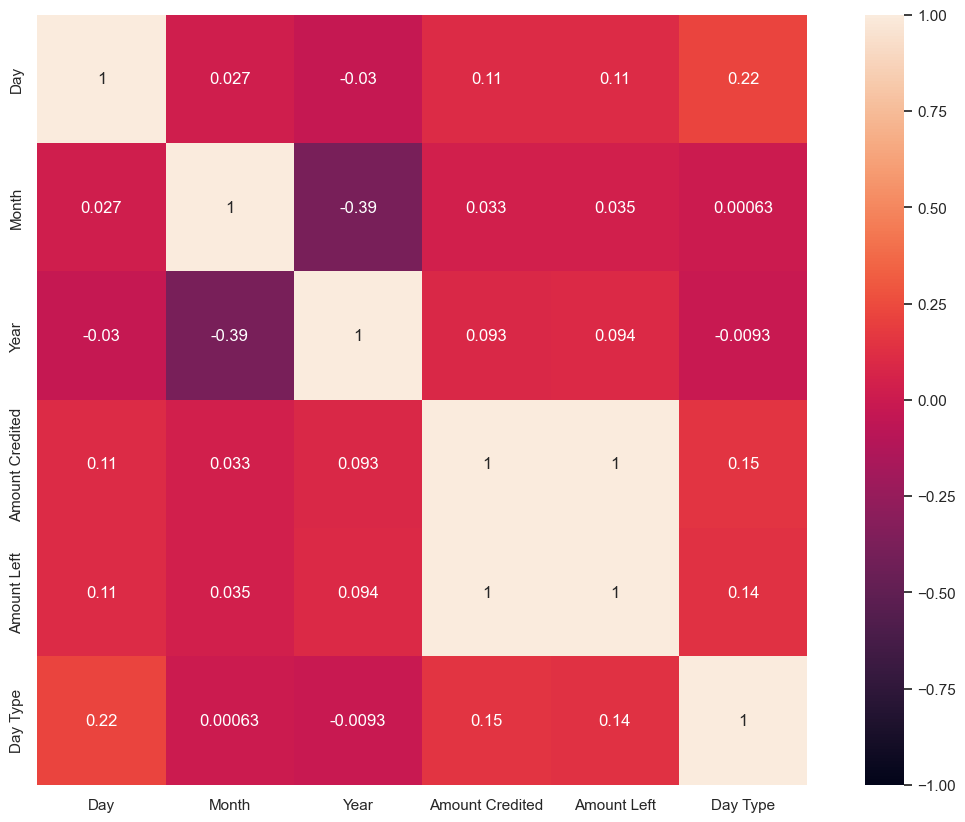

In [12]:
# Imprimiendo la correlación en un mapa de calor

sns.set( rc= {'figure.figsize':(15, 10)})
sns.heatmap( corrVar, vmin = -1, vmax = 1, square=True, annot = True)

<Axes: >

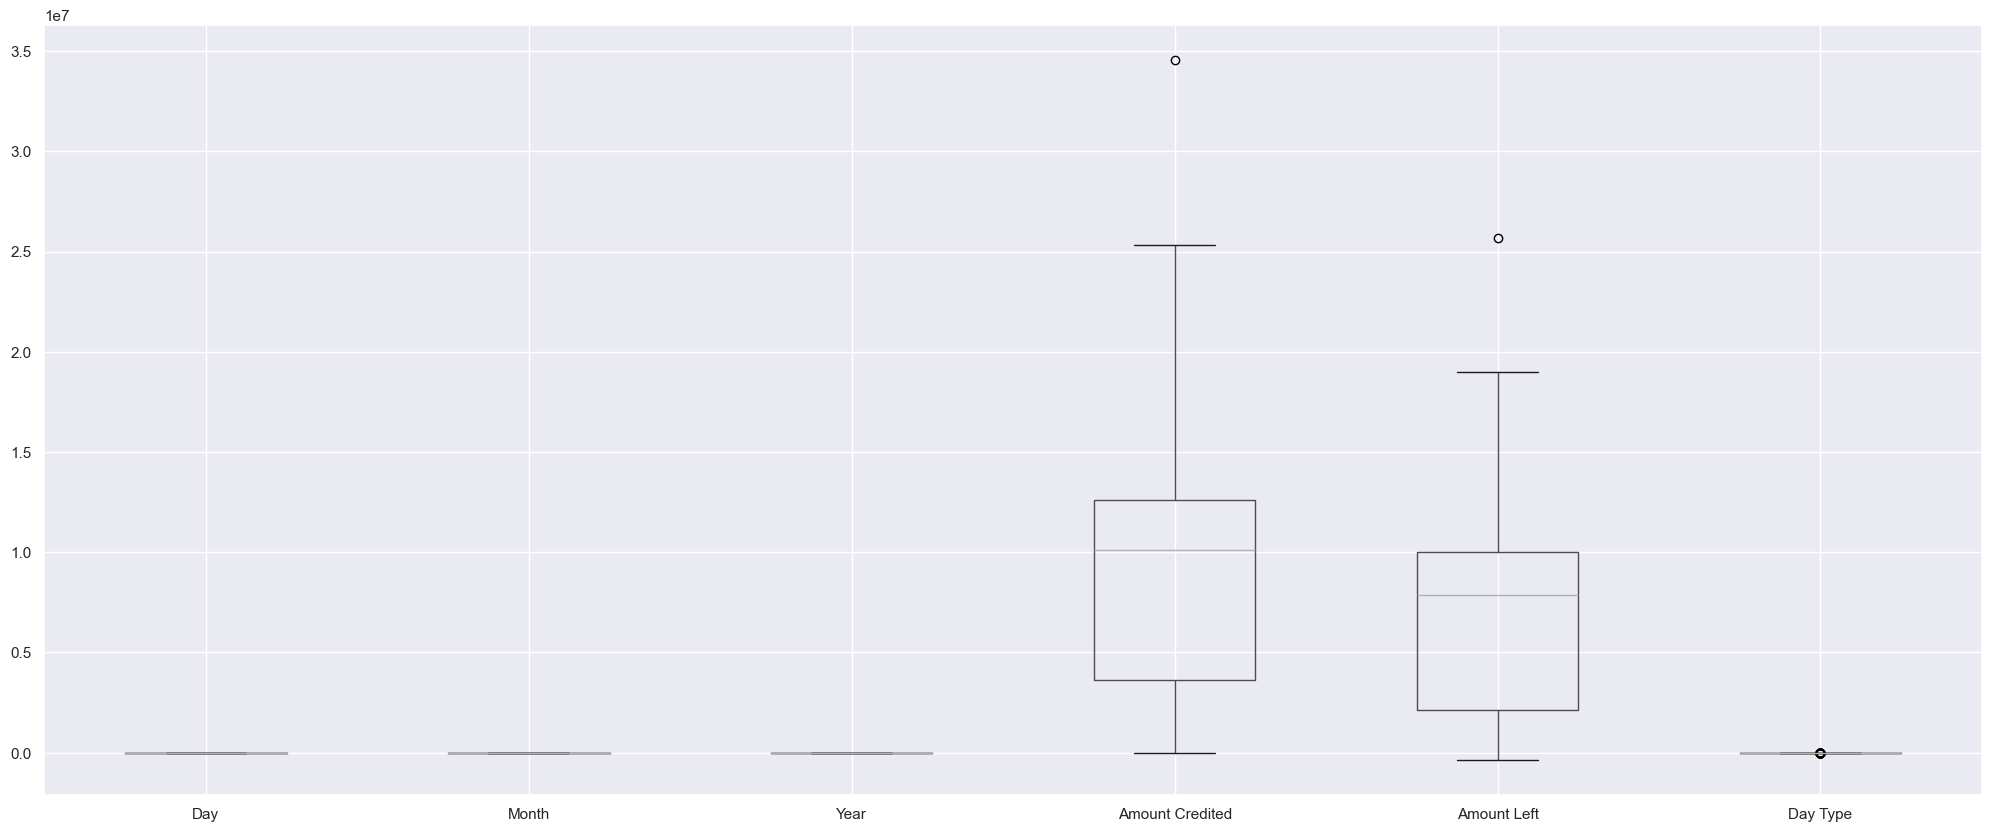

In [13]:
# Generando un bloxplot con las variables del dataset
fondeoDF.boxplot(figsize=(25,10))

array([[<Axes: title={'center': 'Amount Credited'}>,
        <Axes: title={'center': 'Amount Left'}>],
       [<Axes: title={'center': 'Day Type'}>, <Axes: >]], dtype=object)

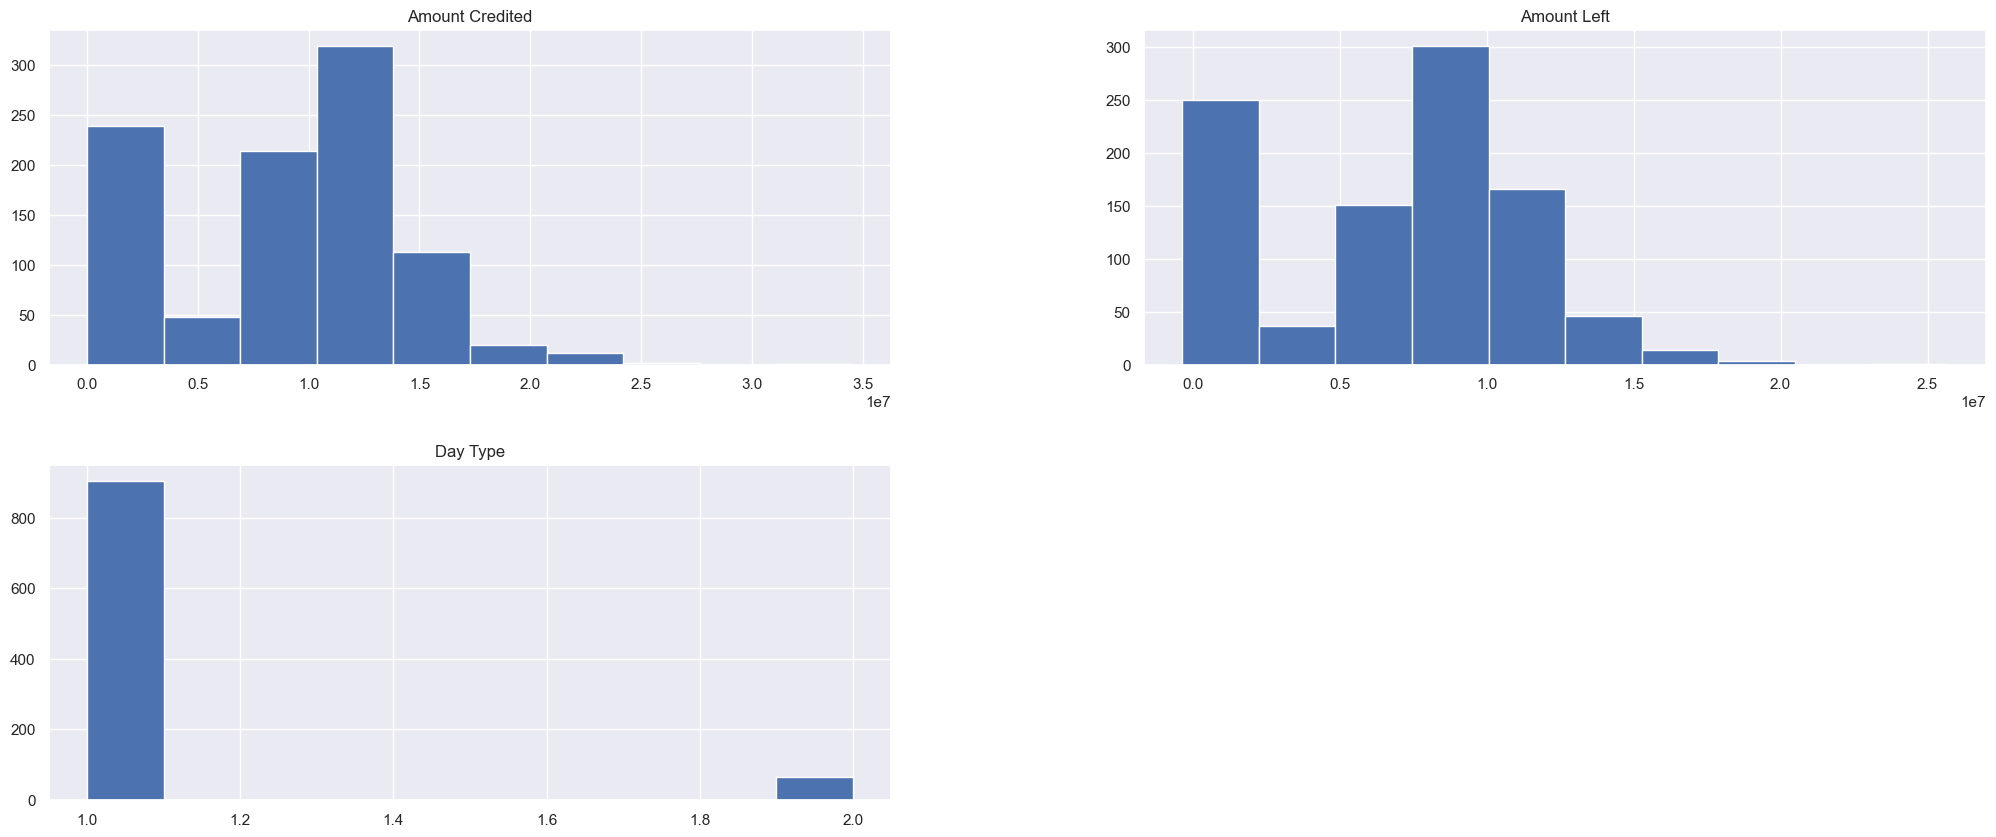

In [14]:
# Se generan los histogramas de las 2 variables principales y también el Day Type
fondeoDFSinFecha = fondeoDF.drop(columns=['Day', 'Month', 'Year', 'Date'])
fondeoDFSinFecha.hist( bins=10 ,figsize=(25,10))

Paso 4 - Realizando un análisis dirigido a las variables principales

De la gráfica de correlación se puede observar que las dos variables de monto son las que tienen la mayor asociación con el resto de las variables por lo que éstas pueden elegirse para continuar el análisis.

Las variables resultantes son:
- X1 - Amount credited
- X2 - Amount left

In [15]:
# Obtenemos una copia del Dataframe pero solo con las columnas del análisis
newDF = fondeoDF.iloc[:,3:5]

# Revisamos contenido
newDF.head()

,Amount Credited,Amount Left
0,1.040468e+07,7921941.905
1,8.616164e+06,7062377.510
2,7.872212e+06,6372551.002
3,7.835058e+06,6331527.590
4,8.701642e+06,7060386.510


In [16]:
# Normalizar los datos a la misma escala, ya que una varible es Edad la otra es Monto y de manera natural son distantes

normalDF = pd.DataFrame(preprocessing.scale(newDF))
normalDF.columns= ["X1","X2"]
normalDF

,X1,X2
0,0.284159,0.244425
1,-0.036044,0.055958
2,-0.169235,-0.095292
3,-0.175886,-0.104286
4,-0.020740,0.055522
...,...,...
963,-1.545623,-1.527462
964,1.333176,1.300038
965,-1.068340,-1.276823
966,0.476288,0.630469


In [17]:
# Ahora se calcula el arreglo de la varianza

Variance = np.cov([normalDF.X1, normalDF.X2])
print("Arreglo de Varianza: \n" + str(Variance))

t= normalDF.var().sum() #Cálculo total de Varianza
varX1 =Variance[0][0] #Varianza Total de X1
varX2 = Variance[1][1] #Varianza Total de X5

print("\n")
print('Total Varianza \t\t:', t.round(2) )
print('Varianza prop. of X1 \t:', ((varX1/t)*100).round(2),'%' )
print('Varianza prop. of X2 \t:', ((varX2/t)*100).round(2),'%' )

Arreglo de Varianza: 
[[1.00103413 0.99768084]
 [0.99768084 1.00103413]]


Total Varianza 		: 2.0
Varianza prop. of X1 	: 50.0 %
Varianza prop. of X2 	: 50.0 %


<Axes: xlabel='X1', ylabel='X2'>

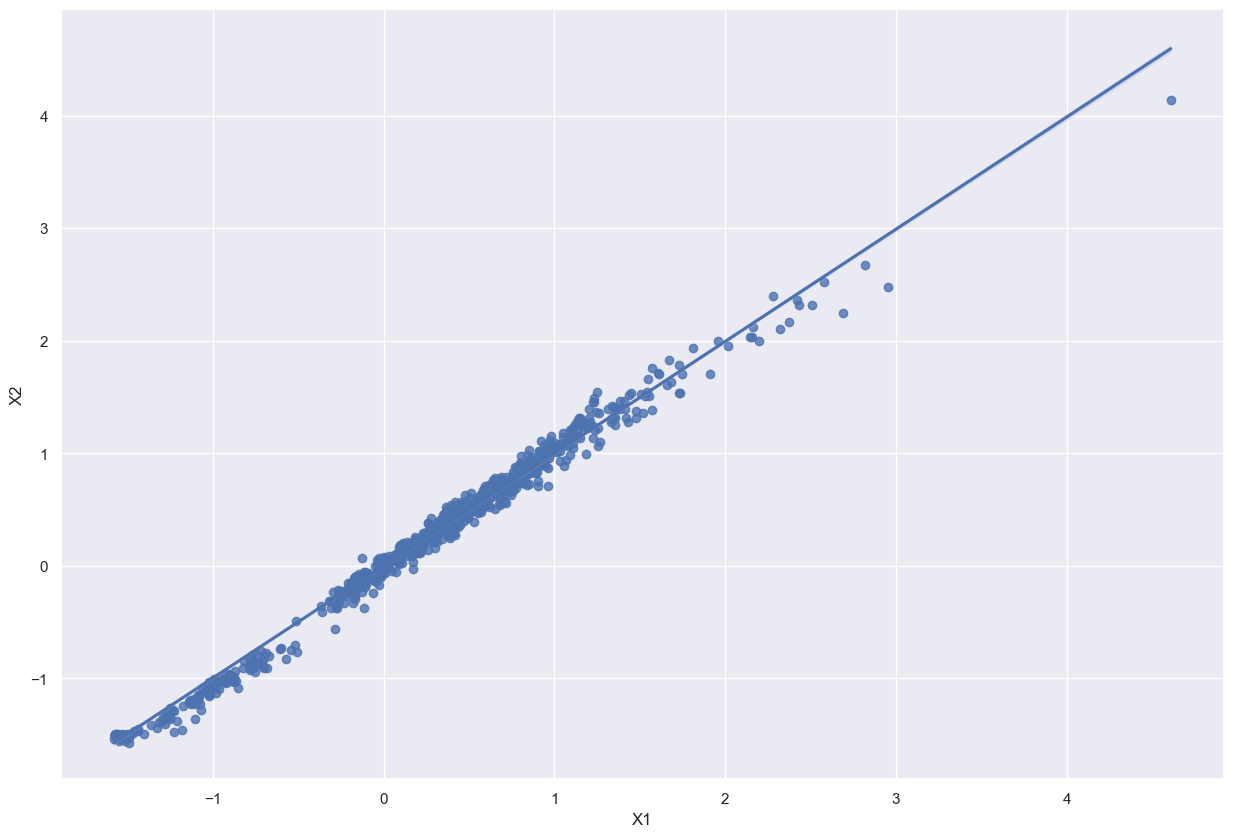

In [18]:
# Generamos la gráfica normalizada

p = sns.regplot(data = fondeoDF,  
                x = normalDF.X1, 
                y = normalDF.X2
               ) 
p

In [19]:
# Generando un nuevo resumen sobre los datos normalizados utilizando PCA

pcs = PCA(n_components=2)

pcs.fit(normalDF[['X1', 'X2']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ["X1", "X2"]
pcsSummary

,X1,X2
Standard deviation,1.413759,0.057908
Proportion of variance,0.998325,0.001675
Cumulative proportion,0.998325,1.000000


In [20]:
normalDF.describe()

,X1,X2
count,9.680000e+02,968.000000
mean,2.936127e-17,0.000000
std,1.000517e+00,1.000517
min,-1.578612e+00,-1.570694
25%,-9.267264e-01,-1.022001
50%,2.358670e-01,0.236303
75%,6.774310e-01,0.703057
max,4.609507e+00,4.141327


# CONCLUSIONES

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 
- Si hay valores faltante y corresponden principlamente a aquellos valores de fin de semana donde normalmente no opera la tesorería de un banco.


¿Cuáles son las estadísticas resumidas del conjunto de datos?
- La cantidad de la muestra es de 1012 elementos, empezando en junio del 2020 hasta marzo del 2023, antes de la limpieza de datos se tienen los siguientes valores principales:

                Amount Credited	Amount Left	    Day Type

count	        9.680000e+02	9.680000e+02	968.000000

mean	        8.817488e+06	6.807160e+06	1.066116

std	            5.588481e+06	4.563191e+06	0.248613

min	            2.882250e+00	-3.565154e+05	1.000000

25%	            3.641171e+06	2.145982e+06	1.000000

50%	            1.013495e+07	7.884900e+06	1.000000

75%	            1.260134e+07	1.001369e+07	1.000000

max	            3.456432e+07	2.569507e+07	2.000000


¿Hay valores atípicos en el conjunto de datos?
- Practicamente no hay atípicos, existe un valor que se presume es un error en los registros y se está verificando, se estará limpiando durante los siguientes procesos.

¿Cuál es la cardinalidad de las variables categóricas?
- Hay pocas variables categóricas, solamente el Tipo de día ( Cardinalidad 2: Pico o Normal ) y los días de la semana (Cardinalidad 7) que sí están integrados en el set de datos.

¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
- No se considera necesario una transformación no lineal.

¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
- No todavía, el análisis inicial no está arrojando una tendencia temporal pero se espera que eso se genere con un proceso más avanzado.

¿Hay correlación entre las variables dependientes e independientes?
- Muy reducida, la relación principal es entre los montos acreditados y los montos debitados.

¿Cómo se distribuyen los datos en función de diferentes categorías?
- Principalmente se distribuyen entre los días de operación normal y los días de operación pico que tienden a presentar variantes ya que continuamente incluyen fines de semana o días festivos.

¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
- No ha sido posible determinarlo, hay que postprocesar todavía la información.

¿Se deberían normalizar las imágenes para visualizarlas mejor?
- No aplica el proceso para nuestro dataset

¿Hay desequilibrio en las clases de la variable objetivo?
- No se detecta un desequilibrio en las clases ya que se los tamaños de las clases son del mismo tamaño y gráficamente no se observa un desequilibrio ya que prácticamente no existen valores atípicos.